In [2]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
# from scipy.spatial.distance import mahalanobis

In [3]:
from sklearn import preprocessing
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [4]:
import os, sys
sys.path.insert(0,os.path.realpath(os.path.pardir))

In [5]:
from utils.config import cfg
from utils.tools import image

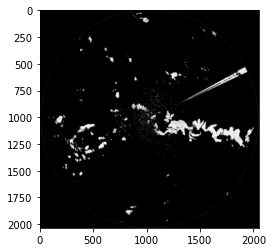

In [6]:
pic = cv2.imread("../data/bkk_radar_images_dBZ/bkk_radar_images_dBZ_1/1592461954.png", 0)

plt.imshow(pic, cmap='gray')
plt.show()

In [7]:
def normalizer_std(X):
    scaler = preprocessing.StandardScaler().fit(X)
    return scaler

def normalizer_minmax(X):
    scaler = preprocessing.MinMaxScaler().fit(X)
    return scaler

In [8]:
class RainfallDataset(Dataset):
    def __init__(self, data_train, normalizer):
        self.data = data_train.astype(np.uint8)
        # self.normalizer = normalizer

    def __getitem__(self, index):
        data = self.data[index] # Retrieve data
        # data = self.normalizer.transform(data.reshape(1, -1)) # Normalize
        return data

    def __len__(self):
        return self.data.shape[0]

In [9]:
df = pd.read_pickle(cfg.ONM_PD.FOLDER_1)
df['FolderPath'] = cfg.RADAR_dBZ_PNG_PATH + df['RADAR_dBZ_PNG_PATH']
df['img_path'] = cfg.RADAR_dBZ_PNG_PATH +  os.sep + df['RADAR_dBZ_PNG_PATH'] +  os.sep + df['FileName'] + ".png"
data_train = image.quick_read_frames(path_list=df['img_path'].tolist()[:1000], grayscale=True)
data_train = data_train.reshape(data_train.shape[0], -1)

In [10]:
normalizer = normalizer_std(data_train[:5]) # We will normalize everything based on x_train

In [11]:
train_dataset = RainfallDataset(data_train, normalizer)

In [12]:
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False, pin_memory=True)

In [13]:
del normalizer, train_dataset

In [14]:
train_item = next(iter(train_loader))

In [15]:
del train_loader

In [16]:
train_item.shape

torch.Size([5, 1, 4165632])

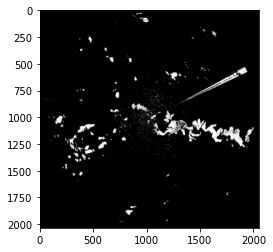

In [17]:
plt.imshow(train_item[0].reshape((2034,2048)), cmap='gray')
plt.show()

In [18]:
train_item[0].reshape((2034,2048))[980:1020, 980:1020]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

## DENOISE

In [10]:
data = dl.data.reshape(2034, 2048)

In [11]:
data_no0 = data.reshape(-1)
data_no0 = data_no0[data_no0!=0]
data_no0

array([103, 103, 103, ..., 103, 103, 103], dtype=uint8)

In [12]:
mu = data_no0.sum() / (2034*2048-1)
mu

7.182260742730213

In [13]:
(data_no0 - mu).shape

(159811,)

In [41]:
diff_dim2 = np.expand_dims((data_no0 - mu), axis=1)
diff_dim2 = diff_dim2 @ diff_dim2.T
diff_dim2.shape

: 

: 

### FAILED...

In [37]:
S = np.matmul(data_no0 - mu, (data_no0 - mu).T) / (2034*2048-1)

In [36]:
S

1282.374674460611

In [34]:
S_pinv = np.matmul(S.T, S) @ S.T

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [13]:
dl.data[:,0].shape

(1, 2034, 2048)

In [34]:
# for i in dl.data.shape[2]:
#     for j in dl.data.shape[3]:
#         dl.data[:,0,i,j]



In [35]:
# mean = np.mean(data, axis=0)

In [36]:
# diff = data - np.expand_dims(mean,axis=0)

In [37]:
# var = np.var(data, ddof=1, axis=1)
# var

In [38]:
# mahal_img = mahalanobis(pic, np.repeat(mean, 2034*2048), np.repeat(var, (2034*2048)**2).reshape(2034*2048,2034*2048))

In [39]:
# diff = pic - mean
# S = diff @ diff.T / diff.shape[0]-1
# S = np.linalg.inv(S.T @ S) @ S.T

In [40]:
# S

In [41]:
# mean + 3*np.sqrt(var)

In [42]:
# filltered_pic = np.zeros(pic.shape)

# for i in tqdm(range(pic.shape[0])):
#     # for j in range(pic.shape[1]):
#     dis = mahalanobis(pic[i], mean, 1/var)
#     if dis > (mean + 3*np.sqrt(var)):
#         filltered_pic[i] = 0
#     else:
#         filltered_pic[i] = pic[i]

In [43]:
# filltered_pic = np.array(filltered_pic, dtype=np.uint32).reshape(2034,2048)

# plt.figure(figsize=(10, 10), dpi=80)
# plt.imshow(filltered_pic, cmap='gray')
# plt.show()

In [44]:
# (filltered_pic.reshape(-1)-pic.reshape(-1)).sum()

In [45]:
# mahalanobis(pic[0,0], mean, var)